In [1]:
%load_ext autoreload
%autoreload 2

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [2]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

In [3]:
ppo_interaction = ppo.PPO_interaction(interaction_configs=ppo_interaction_config_texas,
                    env_configs = texas_holdem_config,
                      actor_configs = actor_configs_texas,
                      critic_configs = critic_configs_texas,
                      llm_configs = texas_holdem_llm_agent_configs,
                  )

train_scores, trained_agents = ppo_interaction.train_multiagent()
print(train_scores)

self obs size: 76
INFO 04-26 21:46:42 __init__.py:207] Automatically detected platform cuda.
INFO 04-26 21:46:48 config.py:549] This model supports multiple tasks: {'reward', 'generate', 'classify', 'embed', 'score'}. Defaulting to 'generate'.
INFO 04-26 21:46:48 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, 

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 04-26 21:46:55 model_runner.py:1115] Loading model weights took 12.8726 GB
INFO 04-26 21:46:55 worker.py:267] Memory profiling takes 0.39 seconds
INFO 04-26 21:46:55 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 04-26 21:46:55 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.16GiB; PyTorch activation peak memory takes 0.99GiB; the rest of the memory reserved for KV Cache is 111.83GiB.
INFO 04-26 21:46:55 executor_base.py:111] # cuda blocks: 15269, # CPU blocks: 546
INFO 04-26 21:46:55 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.64x
INFO 04-26 21:46:57 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memor

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]

INFO 04-26 21:47:07 model_runner.py:1562] Graph capturing finished in 10 secs, took 0.30 GiB
INFO 04-26 21:47:07 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 12.27 seconds



  0%|          | 0/2000 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
INFO 04-26 21:47:07 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


  0%|          | 0/2000 [00:00<?, ?it/s]


TypeError: string indices must be integers

In [5]:
ppo_interaction.testing_episodes = 100
test_scores = ppo_interaction.test_multiagent(trained_agents)
print(test_scores)

100%|██████████| 100/100 [00:00<00:00, 1011.53it/s]

[3.0, -1.0, -0.5, 1.0, 1.0, 4.0, 0.5, -2.0, 0.5, 1.0, 0.5, 4.0, 0.5, 1.0, -0.5, 3.0, 1.0, -2.0, -1.0, 0.5, -1.0, -0.5, -6.0, 1.0, -2.0, -0.5, -1.0, 1.0, 1.0, -0.5, 1.0, 0.5, -3.0, -0.5, 5.0, -3.0, 0.5, -2.0, -2.0, -0.5, 1.0, -0.5, -0.5, 2.0, 0.5, 5.0, -0.5, 1.0, 3.0, 1.0, -0.5, -1.0, -1.0, -2.0, 0.5, 0.5, -4.0, -4.0, 1.0, 2.0, -0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 0.5, -4.0, 0.5, 1.0, -0.5, -0.5, 2.0, -1.0, 1.0, 3.0, -1.0, -1.0, -1.0, 1.0, -5.0, 1.0, -1.0, -1.0, -1.0, 1.0, 0.5, -1.0, -1.0, 2.0, 1.0, 1.0, -0.5, 0.5, -3.0, 0.5, -0.5, 0.5]


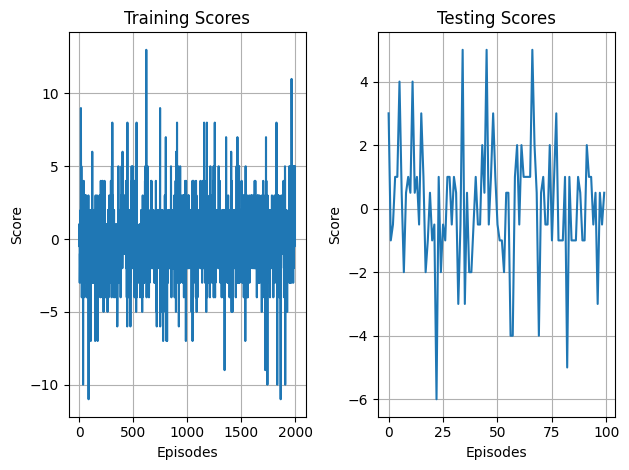

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()


## PPO Example: LunarLander

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_config=ppo_interaction_config,
                      actor_configs = actor_configs,
                      critic_configs = critic_configs
                  )

train_scores, trained_agents = ppo_interaction.train()

In [ ]:
test_scores = ppo_interaction.test()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()

